<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "svg" # для отображения графиков на github установим формат вывода по умолчанию ('svg')

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [34]:
hh_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [35]:
display(hh_df.head())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [36]:
hh_df.shape

(44744, 12)

3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [37]:
hh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [38]:
# получим количество пустых значений в столюцах:
hh_df.isnull().sum()

Пол, возраст                         0
ЗП                                   0
Ищет работу на должность:            0
Город, переезд, командировки         0
Занятость                            0
График                               0
Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Образование и ВУЗ                    0
Обновление резюме                    0
Авто                                 0
dtype: int64

5. Выведите основную статистическую информацию о столбцах.


In [39]:
hh_df.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [40]:
def get_education_type(education):
    """Алгоритм выделения уровня образования (согласно заданного списка) из исходного признака
    
    Args:
        education (object): исходный признак содержащий уровень образования
        
    Returns:
        object: уровень образования 
    """
# На вход данной функции поступает строка с уровнем образования.  
# Создаём список уровней образования для создания нового признака и разбиваем входящее значение на слова:  
    exclude_list = ['высшее', 'неоконченное высшее', 'среднее специальное', 'среднее']
    education_list = education.split(' ')

# Обрезаем список, оставляя в нём количество элементов в зависмости от количества слов в наименовании образования (2 или 3) 
# и формируем строку с названием  
    if education_list[2]=='образование':
        education_type = ((education_list[0].lower()) + ' ' + education_list[1])
    else:
        education_type = (education_list[0].lower())

# Делаем проверку на то, что полученный вид образования попадает в заданный ранее список exclude_list и возвращаем переменную education_type:  
    if education_type in exclude_list:
        return education_type

# Теперь применим эту функцию к столбцу "Образование и ВУЗ"с уровнем образования:    
hh_df['Образование'] = hh_df['Образование и ВУЗ'].apply(get_education_type)
# Проверка полученного результата и удаление столбца 'Образование и ВУЗ':  
print(hh_df['Образование'].nunique())
hh_df = hh_df.drop('Образование и ВУЗ', axis=1)
display(hh_df.head())
display(hh_df.info())


4


,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Обновление резюме                44744 non-null  object
 10  Авто                             44744 non-null  object
 11  Образование                      44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

None

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [41]:
def get_gender(pdata):
    """Алгоритм выделения пола соискателя из исходного признака
    
    Args:
        pdata (object): исходный признак содержащий уровень образования

    Returns:
        object: пол соискателя
    """
# Получение пола из строки с личными данными.
    pdata_list = pdata.split(' , ')
    gender=pdata_list[0]
    if gender=='Мужчина':
        gender='М'
    else:
        gender='Ж'
    return gender

def get_age(pdata):
    """Алгоритм выделения возраста соискателя из исходного признака

    Args:
        pdata (object): исходный признак содержащий возраст соискателя

    Returns:
        int64: возраст соискателя
    """
    # Получение возраста из строки с личными данными:  
    pdata_list = pdata.split(' ,  ')
    age=pdata_list[1]
    age_int=age.split(' ')
    age_int2=int(age_int[0])
    return age_int2

# Теперь применим эту функцию к столбцу "Пол, возраст":  
hh_df['Пол'] = hh_df['Пол, возраст'].apply(get_gender)    
hh_df['Возраст'] = hh_df['Пол, возраст'].apply(get_age)  
# Проверка полученного результата и удаление столбца 'Пол, возраст':  
hh_df = hh_df.drop('Пол, возраст', axis=1)
display(hh_df.head())
print(hh_df['Пол'].value_counts(normalize=True))
print(hh_df['Возраст'].mean())


,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26


М    0.809293
Ж    0.190707
Name: Пол, dtype: float64
32.19674146254246


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [42]:
# Проверка незаполненных данных
display(hh_df.isnull().mean())
display(hh_df[hh_df['Опыт работы']=='Не указано'].shape[0])
display(hh_df[hh_df['Опыт работы'].isnull()].shape[0])
display(hh_df[hh_df['Опыт работы']==None].shape[0])

ЗП                                 0.000000
Ищет работу на должность:          0.000000
Город, переезд, командировки       0.000000
Занятость                          0.000000
График                             0.000000
Опыт работы                        0.003755
Последнее/нынешнее место работы    0.000022
Последняя/нынешняя должность       0.000045
Обновление резюме                  0.000000
Авто                               0.000000
Образование                        0.000000
Пол                                0.000000
Возраст                            0.000000
dtype: float64

2

168

0

In [43]:
   
def get_work(wdata):
    """Алгоритм получения стажа работы в месяцах

    Args:
        wdata (object): исходный признак содержащий стаж работы соискателя

    Returns:
        int64: стаж работы соискателя в месяцах
    """
    # Получение стажа работы:  
    if (wdata == 'Не указано') or (wdata is np.nan):
        return None
    wdata_list = wdata.split(' ')[:7]
    year_list=['лет', 'год', 'года']
    month_list=['месяц', 'месяцев', 'месяца']
    years = 0
    months = 0
    for index, item in enumerate (wdata_list):
        if item in year_list:
            years = int(wdata_list[index-1])
        if item in month_list:
            months = int(wdata_list[index-1])
    return int(years*12 + months)

# Теперь применим эту функцию к столбцу "Опыт работы":  
hh_df['Опыт работы (месяц)'] = hh_df['Опыт работы'].apply(get_work) 
   
# проверка полученного результата и удаление столбца 'Опыт работы':  
hh_df = hh_df.drop('Опыт работы', axis=1)
display(hh_df.head())
display(hh_df['Опыт работы (месяц)'].median())


,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0


100.0

4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [44]:
def get_city(data):
    """Алгоритм получения города (и его категорирование) из исходного признака,содержащего город

    Args:
        data (object): исходный признак содержащий город

    Returns:
        object: категория города в соответствии с определенным перечнем (списком)
    """
    # Получение города из столбца "Город, переезд, командировки": 
    million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 
                  'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград'] 
    cities = ['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие']
    data_list = data.split(' , ')
    
    if (data_list[0] == 'Москва') or  (data_list[0] == 'Санкт-Петербург'):
        return data_list[0]
    elif data_list[0] in million_cities:
        return cities[2]
    else:
        return cities[3]
    
def get_removal(data):
    """Алгоритм получения признака готовности к переезду из исходного признака ('Город, переезд, командировки')

    Args:
        data (object): исходный признак содержащий данные о готовности к переезду

    Returns:
        bool: признак готовности к переезду
    """
    # Получение признака готовности к переезду из столбца "Город, переезд, командировки":
    data_list = data.split(' , ')
    key_list = ['переезду', 'переехать'] # список ключевых слов
    key_word = 'не ' # ключевое слово

    for index, item in enumerate (data_list): 
        for i in range(len(key_list)): 
            if key_list [i] in data_list[index]:  # проверка наличия элементов списка ключевых слов в аргументе функции после разбивки
                if key_word in item: # проверка наличия ключевого слова в требуемой части аргумента 
                    return False
                else: return True     
          
def get_trips(data):
    """Алгоритм получения признака готовности к командировкам из исходного признака ('Город, переезд, командировки')

    Args:
        data (object): исходный признак содержащий данные о готовности к командировкам

    Returns:
        bool: признак готовности к командировкам
    """    
    # Получение признака готовности к командировкам из столбца "Город, переезд, командировки":
    data_list = data.split(' , ')
    #print(data_list)
    # ключевые слова:
    key_word1 = 'командировкам' 
    key_word2 = 'не ' 
    s=False
    for item in data_list: 
        if (key_word1 in item) and (key_word2 not in item):  # проверка наличия ключевых слов в аргументе функции после разбивки
            s=True
    return s   
        
# Теперь применим эту функцию к столбцу "Город, переезд, командировки". 
hh_df['Город'] = hh_df['Город, переезд, командировки'].apply(get_city) 
hh_df['Готовность к переезду'] = hh_df['Город, переезд, командировки'].apply(get_removal) 
hh_df['Готовность к командировкам'] = hh_df['Город, переезд, командировки'].apply(get_trips)   
hh_df = hh_df.drop('Город, переезд, командировки', axis=1)

# Проверка полученного результата и удаление столбца 'Город, переезд, командировки'
display(hh_df.head())
print(hh_df['Город'].value_counts(normalize=True))
print(hh_df['Готовность к переезду'].value_counts(normalize=True))
print(hh_df['Готовность к командировкам'].value_counts(normalize=True))
print(hh_df[(hh_df['Готовность к командировкам']==True) & (hh_df['Готовность к переезду']==True)].shape[0]/hh_df.shape[0])

,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,False,True


Москва              0.371469
другие              0.354327
город-миллионник    0.163866
Санкт-Петербург     0.110339
Name: Город, dtype: float64
False    0.641851
True     0.358149
Name: Готовность к переезду, dtype: float64
True     0.707134
False    0.292866
Name: Готовность к командировкам, dtype: float64
0.3186572501340962


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [45]:
def get_flasher(data, key):
    """Алгоритм проверки наличия ключевого слова в исходном признаке ('Занятость')

    Args:
        data (object): исходный признак потенциально содержащий ключевое слово
        key (str): ключевое слово

    Returns:
        bool: признак готовности к командировкам
    """  
    # Получение признаков-мигалок:   
    data_list = data.split(', ')
    if key in data_list:
        return True
    else:
        return False
    
# Теперь применим эту функцию к столбцам "Занятость" и "график", в качестве аргумента передадим ключевое слово из списка названий новых признаков.
# Столбцы 'Занятость', 'График' удалим. 
busyness = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка'] 
schedule = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']
for item in busyness:
    hh_df[item] = hh_df['Занятость'].apply(get_flasher, key=item) 
for item in schedule:
    hh_df[item] = hh_df['График'].apply(get_flasher, key=item) 
hh_df = hh_df.drop(['Занятость', 'График'], axis=1)   
display(hh_df.head()) 
hh_df.info()
print(hh_df[(hh_df['проектная работа']==True) & (hh_df['волонтерство']==True)].shape[0])
print(hh_df[(hh_df['вахтовый метод']==True) & (hh_df['гибкий график']==True)].shape[0])
    


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,True,False,False,True,True,True,False,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,М,60,233.0,...,True,True,True,False,False,True,True,True,False,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,М,38,225.0,...,True,True,True,False,False,False,False,True,False,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,...,True,False,False,False,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ЗП                               44744 non-null  object 
 1   Ищет работу на должность:        44744 non-null  object 
 2   Последнее/нынешнее место работы  44743 non-null  object 
 3   Последняя/нынешняя должность     44742 non-null  object 
 4   Обновление резюме                44744 non-null  object 
 5   Авто                             44744 non-null  object 
 6   Образование                      44744 non-null  object 
 7   Пол                              44744 non-null  object 
 8   Возраст                          44744 non-null  int64  
 9   Опыт работы (месяц)              44574 non-null  float64
 10  Город                            44744 non-null  object 
 11  Готовность к переезду            44744 non-null  bool   
 12  Готовность к коман

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [46]:
rates_df = pd.read_csv('data/ExchangeRates.csv', sep=',')

def get_date(data):
    """Алгоритм получения даты из исходного признака ('Обновление резюме')

    Args:
        data (object): исходный признак 

    Returns:
        datetime64: дата для обменного курса
    """ 
    data= pd.to_datetime(data, dayfirst=True)
    data2 = data.date() 
    dt64 = np.datetime64(data2)
    return dt64   

# Теперь применим функцию get_date к столбцу "Обновление резюме":  
rates_df['date'] = pd.to_datetime(rates_df['date'], dayfirst=True)
hh_df['Обновление резюме'] = hh_df['Обновление резюме'].apply(get_date) 
display(rates_df.head())

# Получение цифровой части:  
def get_summ(data):
    """Алгоритм получения цифровой части признака ('Сумма ЗП')

    Args:
        data (object): исходный признак 

    Returns:
        str: цифровая часть признака 'Сумма ЗП'
    """  
    data_list = data.split(' ')
    return data_list[0]


def get_iso(data):
    """Алгоритм получения текстовой части признака 'Сумма ЗП' (наименование валюты)

    Args:
        data (object): исходный признак 

    Returns:
        str: текстовая часть признака 'Сумма ЗП' (наименование валюты)
    """ 
    # создадим словарь соответствия названий валют в признаке 'Сумма ЗП' их междурародным обозначениям:  
    dict1 = {'грн.': 'UAH', 'USD': 'USD', 'EUR': 'EUR', 'бел.руб.': 'BYN', 'KGS': 'KGS', 'сум': 'UZS', 'AZN': 'AZN', 'KZT': 'KZT'}
    # приведение названий валюты к международным обозначениям:  
    data_list = data.split(' ')
    if data_list[1] == 'руб.':
        data2 = data_list[1] 
    else:   
        data2 = dict1[data_list[1]]
    return data2

# применим функции get_iso и get_summ к столбцу 'ЗП':  
hh_df['Сумма ЗП'] = hh_df['ЗП'].apply(get_summ) 
hh_df['Валюта ЗП'] = hh_df['ЗП'].apply(get_iso) 
#print(hh_df['Валюта ЗП'].value_counts(normalize=True))
   
# присоединение к таблице с резюме таблицы с курсами валют:
merged = hh_df.merge(
    rates_df,
    left_on = ['Обновление резюме', 'Валюта ЗП'],
    right_on = ['date','currency'],
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)

# создание признака заработной платы в рублях и удаление неинформативных и дублирующих признаков:  
merged['ЗП (руб)'] = ((merged['Сумма ЗП'].astype('float64'))*merged['close'])/merged['proportion']
hh_df = merged.drop(['Сумма ЗП', 'Валюта ЗП', 'currency', 'per', 'date', 'close', 'vol', 'proportion', 'time'], axis=1)            
display(hh_df.head())
display(hh_df.shape)
# вывод медианной зарплаты в руб.:
print(round(hh_df['ЗП (руб)'].median()/1000))



,currency,per,date,time,close,vol,proportion
0,USD,D,2017-12-29,00:00,57.6291,0,1
1,USD,D,2017-12-30,00:00,57.6002,0,1
2,USD,D,2017-12-31,00:00,57.6002,0,1
3,USD,D,2018-01-01,00:00,57.6002,0,1
4,USD,D,2018-01-02,00:00,57.6002,0,1


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,неоконченное высшее,М,39,202.0,...,True,True,False,False,True,True,True,False,True,29000.0
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",2019-04-12,Не указано,высшее,М,60,233.0,...,True,True,False,False,True,True,True,False,False,40000.0
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,среднее специальное,Ж,36,123.0,...,False,False,False,False,True,False,False,False,False,20000.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,2019-04-08,Не указано,высшее,М,38,225.0,...,True,True,False,False,False,False,True,False,False,100000.0
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,2019-04-22,Не указано,высшее,Ж,26,67.0,...,False,False,False,False,True,False,False,False,False,140000.0


(44744, 24)

59


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

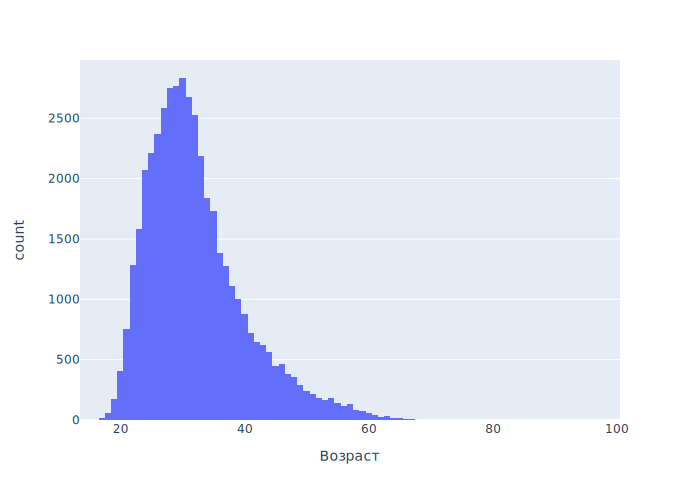

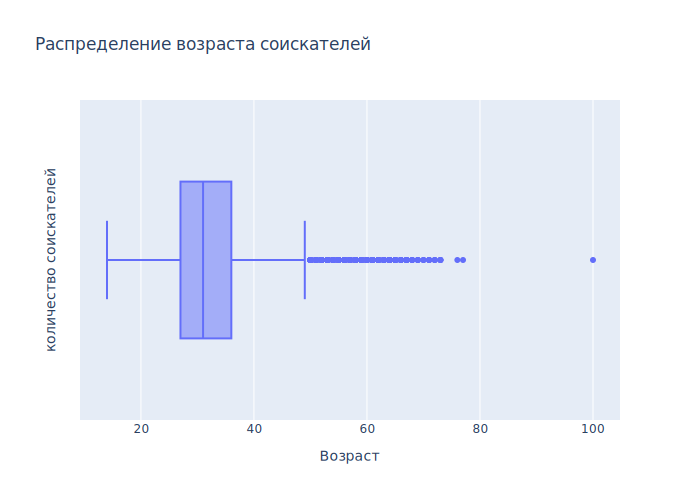

In [47]:
# Построим гистогамму распределения возраста соискателей:  
df = px.data.tips()
fig = px.histogram(hh_df, x="Возраст")
fig.show()
#fig.write_image('data/img1.png')
#fig.write_html("plotly/age_hist.html")

# Построим коробчатую диаграмму распределения возраста соискателей:
import plotly.graph_objects as go  
fig = go.Figure()
fig.add_trace(go.Box(x=hh_df['Возраст'], name=''))
fig.update_layout(title="Распределение возраста соискателей",
                  yaxis_title="количество соискателей",
                  xaxis_title="Возраст")
fig.show()


Мода распределения возраста соискателей составляет 30 лет. Медиана -31 год. Межквартильный размах (от Q25 до Q75) находится в интервале от 27 до 36 лет. Предельные значения признака - (14 лет, 100 лет). Возраст большинства соискателей (от условного максимума до условного минимума) находится в интервале от 14 до 49 лет. Соискатели с возрастом 76, 77 и 100 лет, по моему менению, являются аномалиями, т.к. помимо преклонности возраста все эти соискатели представлены в единственном числе, следовательно высока вероятность ошибки при вводе возраста.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

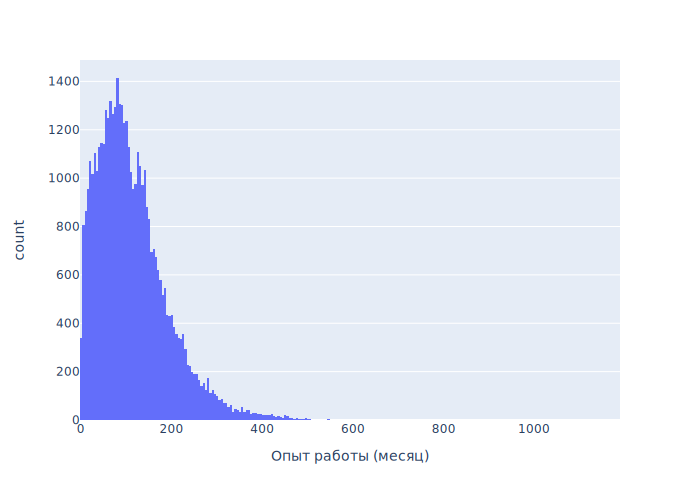

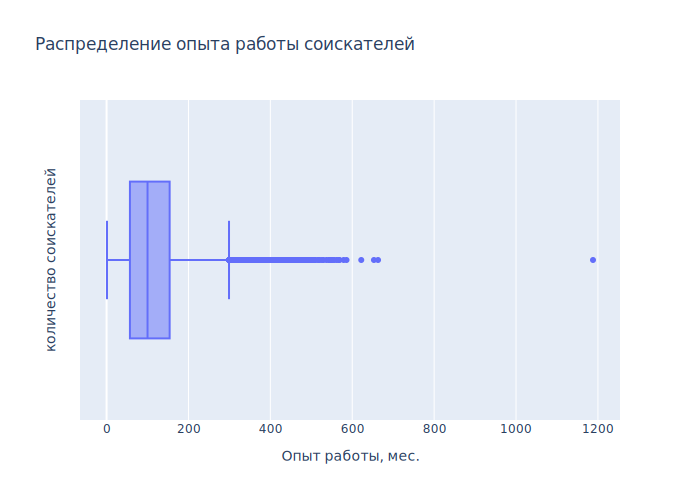

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
3293,50000 руб.,Руководитель проектов,430 военное представительство МО РФ,Специалист первой категории,2019-04-26,Имеется собственный автомобиль,высшее,М,73,663.0,...,False,False,False,False,True,False,False,False,False,50000.0
10044,40000 руб.,Инженер слаботочных систем электрик,"ТЭК СПб, ГУП",Инженер,2019-04-20,Имеется собственный автомобиль,высшее,М,71,653.0,...,True,False,False,False,True,False,False,False,False,40000.0
40015,60000 руб.,Системный администратор Windows,АО ТК Горизонт,Начальник отдела информационных технологий,2019-04-16,Не указано,высшее,М,48,1188.0,...,True,False,False,False,True,False,True,False,True,60000.0
44363,350000 руб.,Эксперт (специалист) по информационной безопас...,"ООО ""КАБЕСТ"", Группа компаний ""Астерос""","Директор департамента, Руководитель службы Гла...",2019-04-26,Не указано,высшее,М,70,622.0,...,False,False,False,False,True,False,False,False,False,350000.0


In [48]:
# Построим гистогамму распределения опыта работы соискателей:  
df = px.data.tips()
fig = px.histogram(hh_df, x="Опыт работы (месяц)")
fig.show()
#fig.write_html("plotly/expir_hist.html")

# Построим коробчатую диаграмму распределения возраста соискателей:    
fig = go.Figure()
fig.add_trace(go.Box(x=hh_df['Опыт работы (месяц)'], name=''))
fig.update_layout(title="Распределение опыта работы соискателей",
                  yaxis_title="количество соискателей",
                  xaxis_title="Опыт работы, мес.")
fig.show()
#fig.write_html("plotly/expir_box.html")

# вВывод данных о соискателях со стажем работы более 600 месяцев (50 лет):  
display(hh_df[hh_df['Опыт работы (месяц)']>600])

Мода распределения опыта работы соискателей составляет 80-84 месяца (около 7 лет). Медиана - 100 месяцев (более 8 лет). Межквартильный размах (от Q25 до Q75) находится в интервале от 57 до 154 месяцев. Опыт работы большинства соискателей (от условного максимума до условного минимума) находится в интервале от 1 до 299 месяцев. Предельные значения признака -(1 мес, 1188 мес).Соискатели с опытом работы более 600 месяцев, по моему менению, являются аномалиями, т.к. помимо маловероятной величины опыта работы (более 50 лет), все эти соискатели представлены в единственном числе, следовательно высока вероятность ошибки при вводе опыта работы. Кроме того возраст соискателя с нереальным опытом работы 1188 мес (99 лет!) составляет 48 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


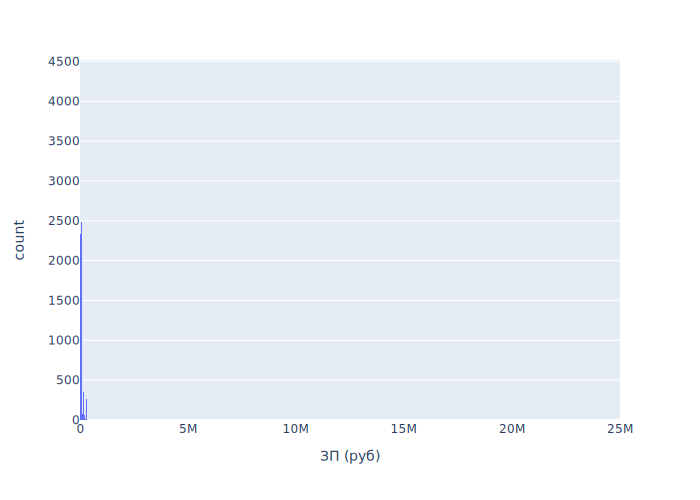

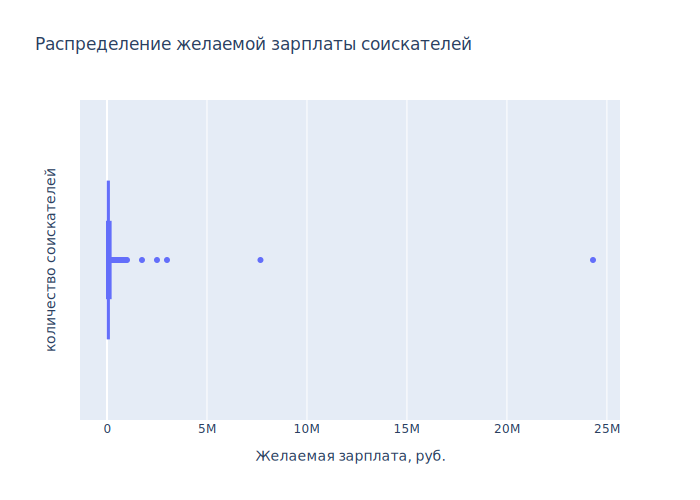

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
6931,380000 USD,"Программирование, Разработка или Системный адм...","Евразийский банк, АО",Главный специалист Отдел разработки систем роз...,2019-04-22,Не указано,высшее,М,31,115.0,...,True,True,False,False,True,True,True,False,False,24304876.0
28253,3000000 руб.,"Руководитель IT проектов, Роботизация, Автомат...",HAMSTER ROBOTICS,Заместитель директора,2019-04-27,Имеется собственный автомобиль,высшее,М,39,280.0,...,True,True,False,False,True,False,True,False,True,3000000.0
32325,1000000 руб.,"Менеджер, Руководитель группы",ОТР 2000,Менеджер инцидентов,2019-04-22,Не указано,высшее,Ж,26,42.0,...,False,False,False,False,True,False,False,False,False,1000000.0
33449,100000 KGS,Менеджер по продажам делегатского участия в ме...,Интернет провайдер,Менеджер проекта,2019-04-15,Имеется собственный автомобиль,высшее,Ж,37,111.0,...,True,True,False,False,True,False,False,False,False,923983.0
39191,120000 USD,Специалист по IT,"ТОО ""AMS""",Системный администратор,2019-04-22,Не указано,среднее специальное,М,29,98.0,...,False,False,False,False,True,False,False,False,False,7675224.0
41924,1750000 руб.,Project manager,Тинькофф Банк,Технолог автоматизации бизнес-процессов,2019-04-22,Не указано,неоконченное высшее,М,24,39.0,...,True,True,False,False,True,False,True,False,False,1750000.0
43134,2500000 руб.,Chief AI Officer,Finnish Russian Univeristy Cooperation in Tele...,Project Manager in Multimedia Technologies,2018-10-25,Не указано,высшее,М,38,97.0,...,False,False,False,False,True,False,False,False,False,2500000.0


,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
70,1800 руб.,Программист 1С 8,Комплексное сопровождение клиентов по автомати...,Программист 1С,2019-05-07,Не указано,высшее,М,35,194.0,...,True,True,False,False,False,False,True,False,False,1800.0000
253,420 руб.,Руководитель аналитики/crm/data science,РОСБАНК,Head of analytics and reporting in CRM,2019-04-10,Не указано,высшее,М,34,154.0,...,False,False,False,False,True,False,False,False,False,420.0000
514,160 руб.,"Oracle DBA, системный инженер",Банк,эксперт,2019-04-19,Не указано,высшее,М,37,162.0,...,True,True,False,False,True,True,True,False,False,160.0000
552,7 USD,3D художник,ООО «Центр технологий и медиа групп»,3D-дизайнер,2019-04-26,Не указано,высшее,М,27,48.0,...,True,True,True,True,True,True,True,False,True,452.7558
963,2000 руб.,"Технический специалист, системный администрато...",ООО Дата-стар,Специалист по информационным технологиям,2019-04-25,Не указано,высшее,М,31,175.0,...,True,False,False,False,False,True,True,False,False,2000.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42841,85 руб.,Ведущий системный администратор,"ГАЗИНФОРМСЕРВИС, ООО",Старший инженер,2019-04-22,Не указано,высшее,М,32,114.0,...,False,False,False,False,True,True,False,False,False,85.0000
43385,1 руб.,Директор по управлению проектами / Директор по...,One Agile,Исполнительный директор,2019-05-07,Не указано,высшее,М,46,282.0,...,False,False,False,False,True,False,False,False,False,1.0000
43687,1000 руб.,Контент-редактор,ООО Организация 2,Экономист,2019-04-21,Не указано,высшее,Ж,32,127.0,...,True,False,False,True,False,False,True,False,False,1000.0000
43771,3000 руб.,Системный администратор-программист,ИП_Вячеславова Н.В,Системный администратор - программист,2019-04-22,Имеется собственный автомобиль,высшее,М,29,105.0,...,True,False,False,False,False,True,True,False,False,3000.0000


In [49]:
# Построим гистогамму распределения возраста соискателей:  
df = px.data.tips()
fig = px.histogram(hh_df, x="ЗП (руб)", range_x=[0, 25000000])
fig.show()
#fig.write_html("plotly/pay_hist.html")
 
# Построим коробчатую диаграмму распределения зарплаты соискателей:  
fig = go.Figure()
fig.add_trace(go.Box(x=hh_df['ЗП (руб)'], name=''))
fig.update_layout(title="Распределение желаемой зарплаты соискателей",
                  yaxis_title="количество соискателей",
                  xaxis_title="Желаемая зарплата, руб.")
fig.show()
#fig.write_html("plotly/pay_box.html")

# Вывод данных о соискателях с ожидаемой зарплатой менее 5000 руб. и более 923000 руб.:  
display(hh_df[hh_df['ЗП (руб)']>923000])
display(hh_df[hh_df['ЗП (руб)']<5000])

Предельные значения признака - (1 руб., 24304876 руб.). Межквартильный размах (от Q25 до Q75) находится в интервале от 37 до 95 тыс.руб. Желаемая зарплата  большинства соискателей (от условного максимума до условного минимума) находится в интервале от 1 руб. до 181 тыс.руб. Соискатели с желаемой зарплатой более 1 млн.руб. и менее 5 тыс.руб., по моему менению, являются аномалиями, т.к. помимо маловероятной величины желаемой зарплаты, все такие соискатели представлены в единственном числе, следовательно высока вероятность ошибки при вводе желаемой зарплаты (неверное указание валюты или прибавление лишнего нуля/пропуск нуля). Из указанных соискателей с желаемой зарплатой более 1 млн.руб. возможно не является аномалией зарплата для Руководителя IT проектов с последним местом работы "Заместитель директора HAMSTER ROBOTICS" 

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

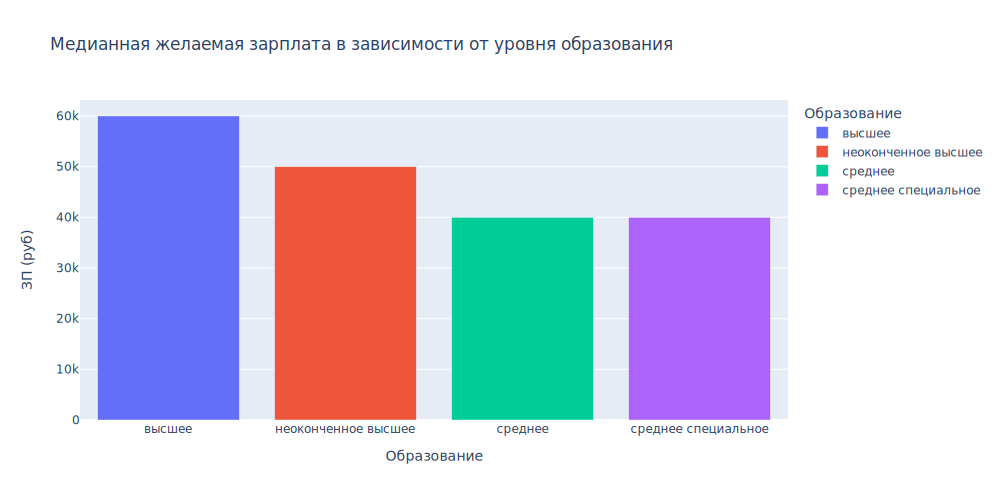

In [50]:
# Построим гистограмму показывающую медианную желаемую зарплату в разрезе образования:  
# датафрейм:  
bar_data = hh_df[hh_df['ЗП (руб)'] < 1000000].groupby(
    by='Образование',
    as_index=False
)[['ЗП (руб)']].median()

# строим график:  
fig = px.bar(
    data_frame=bar_data, 
    y="ЗП (руб)", 
    x="Образование", 
    color='Образование', #расцветка в зависимости от образования
    orientation='v', 
    width=1000,
    title='Медианная желаемая зарплата в зависимости от уровня образования'
)

# отображаем график:  
fig.show()
#fig.write_html("plotly/pay_on_educ_bar.html")


Наибольший уровень ожидаемой  заработной платы у соискателей с высшим образованием, наименьший - у соискателей со средним специальным образованием. Налицо четкая прямая зависимость уровня ожидаемой заработной платы от уровня образования, следовательно признак уровня образования важен для прогнозирования заработной платы (хотя возможно корректнее было бы делать такой вывод на основании данных уровня зарплаты принятых на работу сотрудников, а не пожеланий соискателей)

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

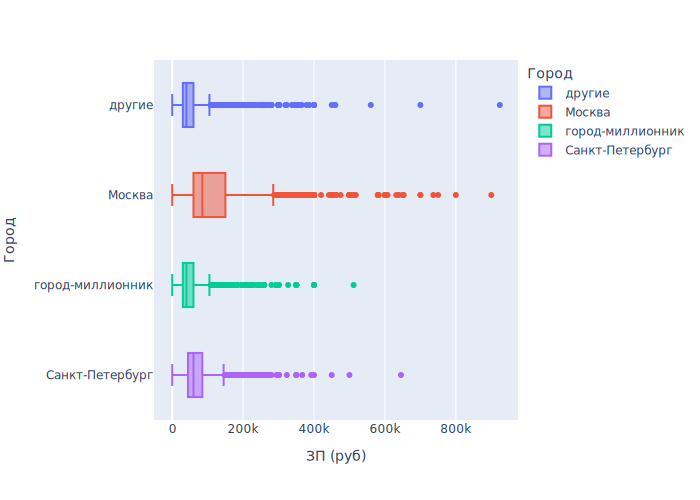

In [51]:
# Сформируем датафрейм отбросив аномальные значения зарплаты:  
box_data = hh_df[hh_df['ЗП (руб)']< 1000000]

# Построим коробчатую диаграмму:  
fig = px.box(box_data, y="Город", x="ЗП (руб)", color="Город")
fig.update_traces(quartilemethod="exclusive") 
fig.show()
#fig.write_html("plotly/pay_on_city_box.html")


Наибольший медианный уровень ожидаемой  заработной платы у соискателей из Москвы (85 тыс.руб.), далее следуют соискатели из Санкт-Петербурга (60 тыс.руб.),  наименьший - у соискателей из городов-милионников и других городов (40 тыс.руб.). С учетом имеющейся зависимости уровня ожидаемой заработной платы от города можно сделать вывод, что данный признак важен для прогнозирования заработной платы. Межквартильный размах имеет наиболее широкий диапазон (от 60 до 150 тыс.руб.) в Москве, далее в Санкт-Петербурге (от 44 до 85 тыс.руб.), и наименьший в городах-милионниках и других городах (от 30 до 60 тыс.руб).

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

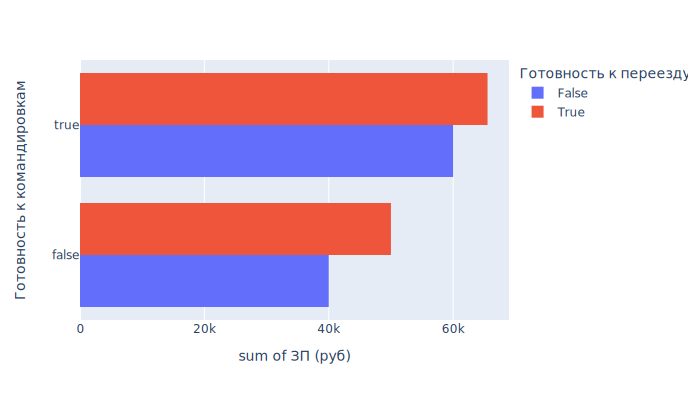

In [52]:
# Подготовим датафрейм (сгрупперуем по признакам и агрегируем по медианному значению):
bar_data = hh_df[hh_df['ЗП (руб)'] < 1000000].groupby(
    by=['Готовность к переезду', 'Готовность к командировкам'],
    as_index=False
)[['ЗП (руб)']].median()
# display (bar_data)

# Отобразим столбчатую диаграмму (один из признаков как color):
fig = px.histogram(bar_data, x='ЗП (руб)', y='Готовность к командировкам',
             color='Готовность к переезду', 
             barmode='group',
             height=400)
fig.show()
#fig.write_html("plotly/pay_on_removal_hist.html")

Наибольший уровень медианной ожидаемой зарплаты наблюдается для соискателей готовых одновременно и к переезду и к командировкам (65,5 тыс.руб.). Далее следуют соискатели готовые к командировкам, но не готовые к переезду (60 тыс.руб.), затем соискатели готовые к переезду, но не готовые к коммандировкам (50 тыс.руб.) и соответственно наименьший уровень зарплаты у соискателей не готовых ни к переезду не к коммандировкам (40 тыс.руб.).

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
высшее,60000.0,NaN,122582.49,90075.5,30000.0,30000.0,30000.0,35000.0,40000.0,45000.0,...,70000.0,79000.0,112500.0,80000.0,75000.0,75000.0,62500.0,45000.0,90000.0,NaN
неоконченное высшее,NaN,NaN,NaN,80000.0,25000.0,30000.0,31000.0,35000.0,40000.0,40000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
среднее,NaN,10000.0,NaN,44000.0,35000.0,45000.0,29000.0,40000.0,40000.0,35000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
среднее специальное,NaN,2000.0,30000.00,25000.0,25151.0,30000.0,30000.0,30000.0,30000.0,35000.0,...,120000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60000.0


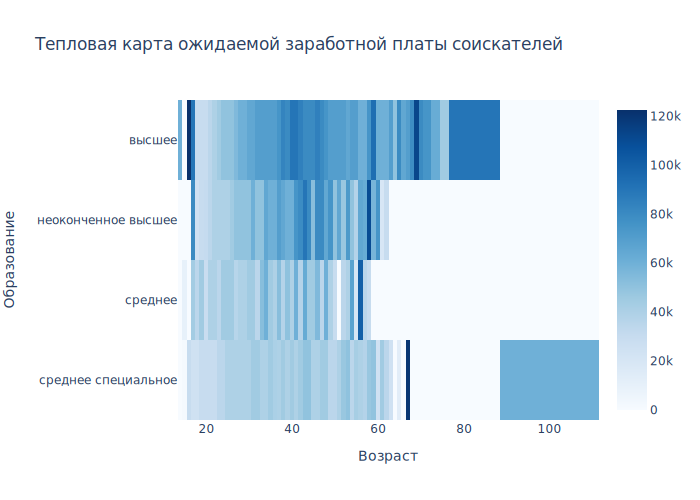

In [53]:
# Построим сводную таблицу:  
pivot=hh_df[hh_df['ЗП (руб)'] < 1000000].groupby(['Образование', 'Возраст'])['ЗП (руб)'].median().unstack()
display(pivot)

# Построим тепловую карту:  
pivot2=hh_df[hh_df['ЗП (руб)'] < 1000000]
pivot3=pivot2.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median',
    fill_value=0
)
fig = px.imshow(pivot3, color_continuous_scale="blues", aspect="auto", title="Тепловая карта ожидаемой заработной платы соискателей")
fig.show('svg')
#fig.write_html("plotly/educ_on_age_ims.html")


Наибольшая медианная ожидаемая зарплата в разрезе возраста характерна для соискателей с высшим образованием (далее в порядке убывания: неоконченное высшее, среднее, среднее специальное).Аналогично самый быстрый карьерный рост также характерен для высшего образования (достигая наибольших значений к 38-41 году)

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

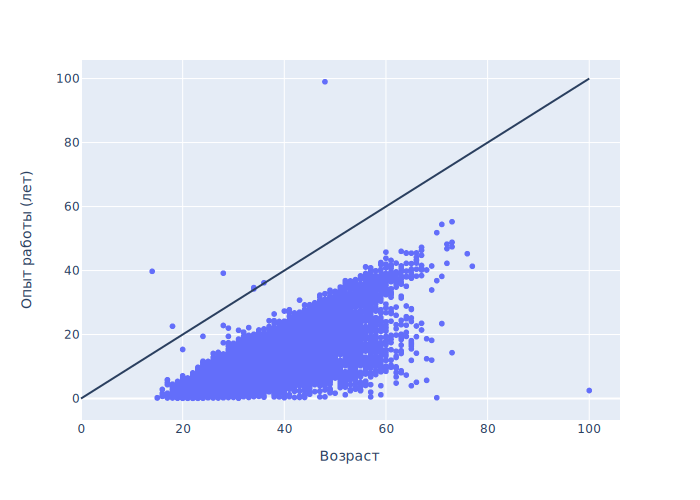

In [54]:
# Построим диаграмму рассеяния: и дополнительную прямую:
hh_df['Опыт работы (лет)']=hh_df['Опыт работы (месяц)']/12
fig = px.scatter(hh_df, x="Возраст", y="Опыт работы (лет)")

fig.add_shape(type="line",
              x0=0, 
              y0=0, 
              x1=100, 
              y1=100)
fig.show('svg')
hh_df = hh_df.drop('Опыт работы (лет)', axis=1)
#fig.write_html("plotly/exper_on_age_scat.html")


На графике выявлено 7 аномальных значений (опыт работы больше возраста).

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


1. Рассмотрим зависимость медианной ожидаемой заработной платы соискателей на должность Data Scientist в зависимости от категории города

32


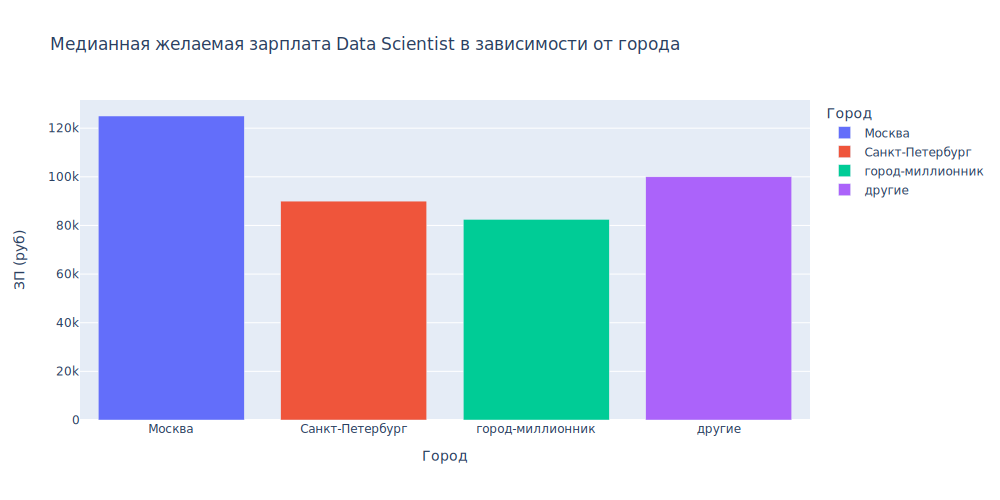

In [55]:
# воспользуемся функцией-мигалкой для поиска записей (резюме) претенденотов на должность Data Scientist:  
def get_flasher(data, key):
    """Алгоритм проверки наличия ключевого слова в исходном признаке ('Ищет работу на должность:')

    Args:
        data (object): исходный признак потенциально содержащий ключевое слово
        key (str): ключевое слово

    Returns:
        bool: признак готовности к командировкам
    """  
    # Получение признака-мигалки:   
    data_list = data.split(', ')
    if key in data_list:
        return True
    else:
        return False
    
# Теперь применим эту функцию к столбцу 'Ищет работу на должность:', 
# в качестве аргумента передадим ключевое слово с названием должности:  
key_word = 'Data Scientist'
mask = hh_df['Ищет работу на должность:'] == key_word

hh_df[key_word] = hh_df['Ищет работу на должность:'].apply(get_flasher, key=key_word) 
print(hh_df[mask].shape[0])  
    
bar_data = hh_df[mask].groupby(
    by='Город',
    as_index=False
)[['ЗП (руб)']].median()

# Строим график: 
message = f"Медианная желаемая зарплата {key_word} в зависимости от города"
fig = px.bar(
    data_frame=bar_data, 
    y="ЗП (руб)", 
    x="Город", 
    color='Город', #расцветка в зависимости от города
    orientation='v', 
    width=1000,
    title=message
)

# Отображаем график:  
fig.show()
#fig.write_html("plotly/ds_pay_on_city_bar.html")

# Столбец 'Data Scientist' после построения гистограммы удалим:   
hh_df = hh_df.drop([key_word], axis=1) 

Наибольшая медианная желаемая зарплата соискателей на позицию Data Scientist зафиксирована в Москве (125 тыс.руб.), далее вопреки ожиданиям идут "другие" города (100 тыс.руб.). Вероятно это связано с тем, что количество соискателей на данную позицию незначительно (32 чел по всей базе), соответственно влияние оказала недостаточная величина выборки.  

2. Рассмотрим зависимость средней ожидаемой зарплаты от возраста соискателя. Найдем возраст соотвествующий максимальным ожиданиям по доходу.

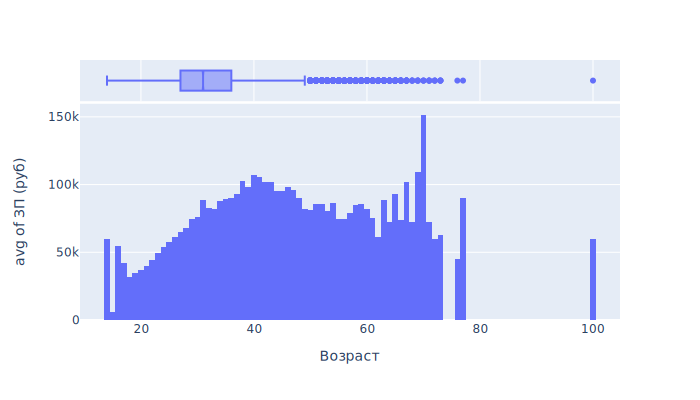

In [56]:

# отобразим гистограмму, отображающую зависимость средней ожидаемой зарплаты от возраста соискателя:
fig = px.histogram(hh_df, 
             y='ЗП (руб)', 
             x='Возраст',
             histfunc ='avg',
             marginal = 'box',
             height=400)
fig.show()
#fig.write_html("plotly/pay_on_age_hist_bar.html")


Гистограмма распределения показывает, что возораст (если не считать незгначительного количества значений за пределами пенсионного возраста) максимальных ожиданий по зарплате соответствует 40 годам.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [57]:
dupl_columns = list(hh_df.columns)
mask = hh_df.duplicated(subset=dupl_columns)

hh_duplicates = hh_df[mask]
print(f'Число найденных дубликатов: {hh_duplicates.shape[0]}')

hh_df = hh_df.drop_duplicates(subset=dupl_columns)
print(f'Результирующее число записей: {hh_df .shape[0]}')


Число найденных дубликатов: 161
Результирующее число записей: 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [58]:
cols_null_sum = hh_df.isnull().sum()
cols_with_null = cols_null_sum[cols_null_sum>0].sort_values(ascending=False)
display(cols_with_null)

Опыт работы (месяц)                168
Последняя/нынешняя должность         2
Последнее/нынешнее место работы      1
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [59]:
# удаление строк с пропусками в столбцах с местом работы и должностью:
hh_df.dropna(subset=['Последняя/нынешняя должность','Последнее/нынешнее место работы'], how='any', axis=0, inplace=True)
# заполнение пропусков в столбце с опытом работы медианным значением:
hh_df = hh_df.fillna({'Опыт работы (месяц)':hh_df['Опыт работы (месяц)'].median()})

# проверка полученной таблицына наличие пропусков:
display(hh_df.isnull().mean())
#display(hh_df.shape[0])

# получим результирующее среднее значение в столбце «Опыт работы (месяц)» 
display(hh_df['Опыт работы (месяц)'].mean())

ЗП                                 0.0
Ищет работу на должность:          0.0
Последнее/нынешнее место работы    0.0
Последняя/нынешняя должность       0.0
Обновление резюме                  0.0
Авто                               0.0
Образование                        0.0
Пол                                0.0
Возраст                            0.0
Опыт работы (месяц)                0.0
Город                              0.0
Готовность к переезду              0.0
Готовность к командировкам         0.0
полная занятость                   0.0
частичная занятость                0.0
проектная работа                   0.0
волонтерство                       0.0
стажировка                         0.0
полный день                        0.0
сменный график                     0.0
гибкий график                      0.0
удалённая работа                   0.0
вахтовый метод                     0.0
ЗП (руб)                           0.0
dtype: float64

114.35777573405711

4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [60]:
# создадим маски по зарплате (менее 1000 руб и более 1000000 руб.) и применим их к датафрейм:
mask1 = hh_df['ЗП (руб)']<1000
mask2 = hh_df['ЗП (руб)']>1000000
outliers = hh_df[mask1 | mask2]
print(outliers.shape[0])

# удалим выбросы из датафрейм:
hh_df = hh_df.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_df.shape[0]}')

89
Результирующее число записей: 44492


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [61]:
# создадим маску по соотношению возраста и опыта работы и применим ее к датафрейм:
mask1 = hh_df['Опыт работы (месяц)']/12 > hh_df['Возраст']
outliers = hh_df[mask1]
print(outliers.shape[0])

# удалим выбросы из датафрейм:
hh_df = hh_df.drop(outliers.index, axis=0)
print(f'Результирующее число записей: {hh_df.shape[0]}')

7
Результирующее число записей: 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
31137,10000 руб.,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,...,True,False,False,False,False,True,True,False,False,10000.0
32950,2000 руб.,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,...,False,False,False,False,True,False,False,False,False,2000.0
33654,60000 руб.,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,...,True,True,False,True,True,False,True,False,False,60000.0


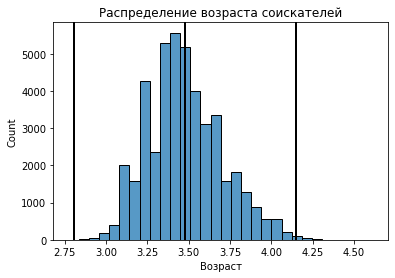

In [62]:
log_age= np.log(hh_df['Возраст'] + 1)
histplot = sns.histplot(log_age , bins=30)
histplot.set_title('Распределение возраста соискателей')
histplot.axvline(log_age.mean(), color='k', lw=2)
histplot.axvline(log_age.mean()-3*log_age.std(), color='k', lw=2)
histplot.axvline(log_age.mean()+3*log_age.std(), color='k', lw=2)


# пригодится алгоритм метода 3 сигм из модуля 14:
def outliers_z_score(data, feature, log_scale=False):
    if log_scale:
        x = np.log(data[feature]+1)
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - 3 * sigma
    upper_bound = mu + 4 * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    return outliers, cleaned

# выводим таблицу с выбросами:
outliers, cleaned = outliers_z_score(hh_df, 'Возраст', log_scale=True)
display (outliers)

Распределение признака "возраст" в логорифмическом масштабе имеет правостороннюю ассиметрию. В категорию выбросов попали резюме с возрастом 15 и менее лет и 100 и более лет соотвественно.